# LAB 2

# Part 1) Influenza national summary


Tweeks made in csv file:
1) The File first row had only one column name as Title for the csv. It was removed as csv read was failing
2) Concatenation of Year and Week

In [1]:
#Read csv
div <- read.csv("WHO_NREVSS_Clinical_Labs.csv",header=T, dec=".",sep=",",stringsAsFactors = FALSE)

#Create dataframe for bar plot
d<-data.frame(div$WEEK, div$TOTAL.A, div$TOTAL.B)
names(d) <- c("Week","A","B")#Rename the column names

#Create Dataframe for line plot
l<- data.frame(div$WEEK,div$PERCENT.POSITIVE,div$PERCENT.A,div$PERCENT.B)
#Re-evaluate the values as we have to plot two y-axis and the line plot is made according to the seconf y-axis, which is plot as *400 of the primary y-axis
l$div.PERCENT.POSITIVE<- l$div.PERCENT.POSITIVE*400 
l$div.PERCENT.A<- l$div.PERCENT.A*400 
l$div.PERCENT.B<- l$div.PERCENT.B*400 

Warning message:
“Removed 11 rows containing missing values (geom_path).”Warning message:
“Removed 11 rows containing missing values (geom_path).”Warning message:
“Removed 11 rows containing missing values (geom_path).”

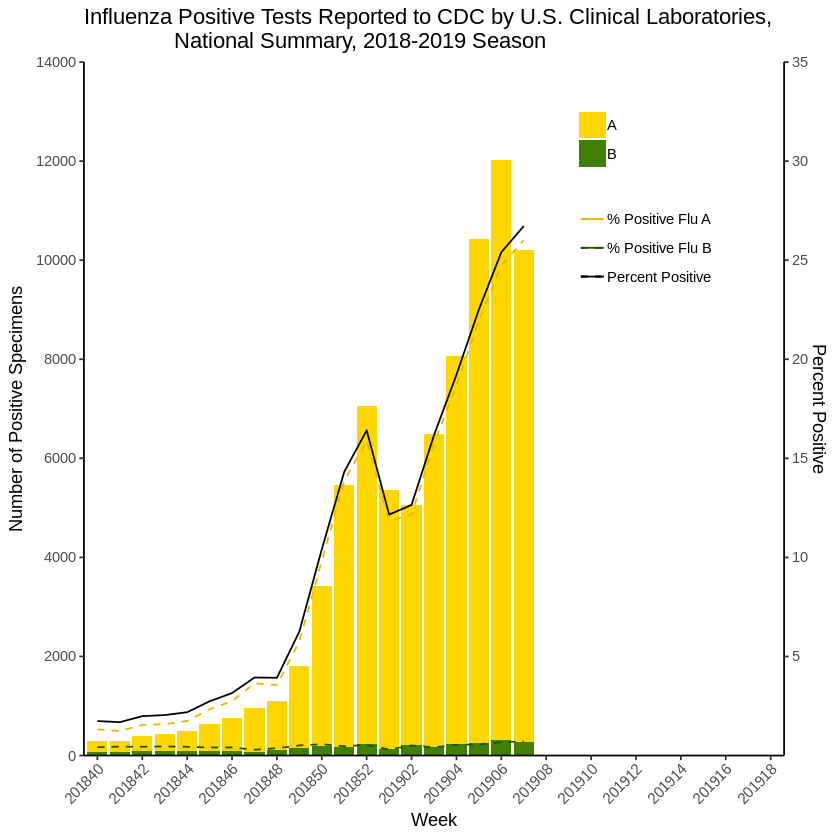

In [7]:
library(reshape2)
library(ggplot2)

#Melt Function stack all the columns to single column w.r.t Week
df <- melt(d, id.var="Week")
#variable=A or B, value = Total A OR B
g<-ggplot() + 
  geom_bar(data=df,aes(x = factor(Week), y = value, fill=variable),stat = "identity")+theme_classic()

#Add lines
g<-g+geom_line(data=l,aes(x=factor(div.WEEK), y=div.PERCENT.POSITIVE,color="Percent Positive"),stat="identity",group = 1)
g<-g+geom_line(data=l,aes(x=factor(div.WEEK), y=div.PERCENT.A,color="% Positive Flu A"),stat="identity",group = 1,linetype = "dashed")
g<-g+geom_line(data=l,aes(x=factor(div.WEEK), y=div.PERCENT.B,color="% Positive Flu B"),stat="identity",group = 1,linetype = "dashed")
#Set Y axis: Limits, breaks, secondary axis
g<-g+scale_y_continuous(expand = c(0, 0), limits = c(0, 14000),breaks = c(0,2000,4000,6000,8000,10000,12000,14000),name = expression("Number of Positive Specimens"),sec.axis = sec_axis(~./400, name="Percent Positive",breaks=c(5,10,15,20,25,30,35)))
#Color the lines
g<- g+ scale_colour_manual(" ", values=c("Percent Positive"="Black","% Positive Flu A"="#e6b800","% Positive Flu B"="#264d00"))
#Set X-axis labels
g<-g+scale_x_discrete(breaks=seq("201840", "201918", 2))+theme(axis.text.x = element_text(angle = 45, hjust = 1))
#Set barplot colors
g<-g+scale_fill_manual(" ", values=c("#ffd700","#408000"),labels=c("A", "B"))
#Set legend
g+theme(legend.key=element_blank(),
          legend.title=element_blank(),
          legend.box="vertical",legend.position = c(0.8, 0.8))+labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\n               National Summary, 2018-2019 Season",x="Week",y="Number of Positive Specimens")

# 2) Positive tested

Tweeks made in csv file:
1) The File first row had only one column name as Title for the csv. It was removed as csv read was failing
2) Concatenation of Year and Week

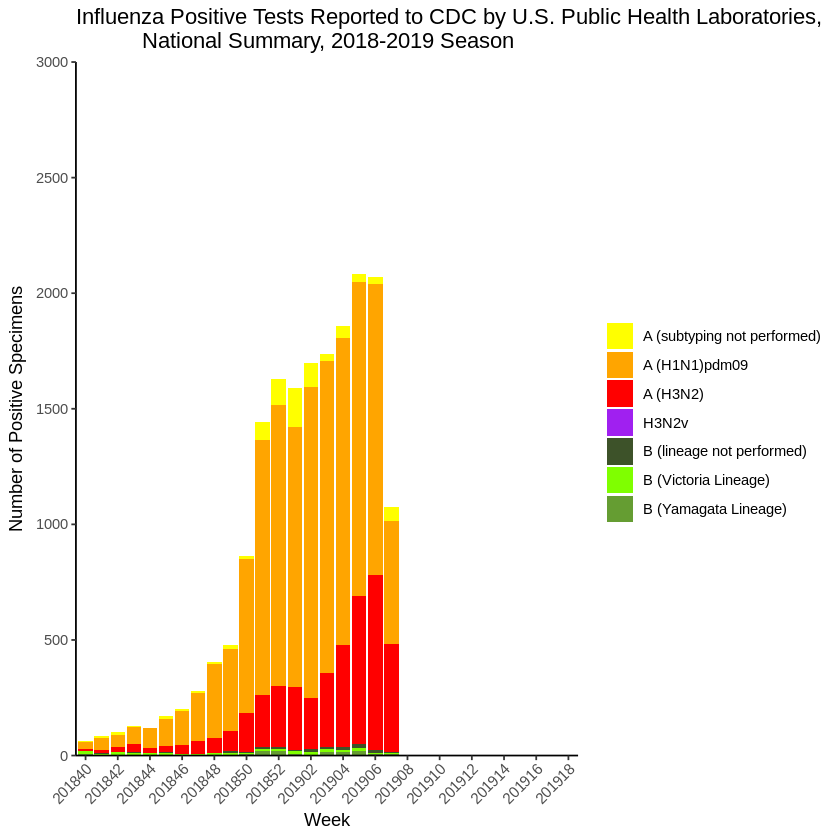

In [8]:
#Read CSV and plot stacked BarGraph
div <- read.csv("WHO_NREVSS_Public_Health_Labs.csv",header=T, dec=".",sep=",")
d<- data.frame(div$WEEK,div$A..Subtyping.not.Performed.,div$A..2009.H1N1.,div$A..H3.,div$H3N2v,div$B,div$BYam,div$BVic)
library(reshape2)
df<-melt(d, id.var="div.WEEK")
g<-ggplot() + 
  geom_bar(data=df,aes(x = factor(div.WEEK), y = value, fill=variable),stat = "identity")+theme_classic()
g+scale_y_continuous(expand = c(0, 0), limits = c(0, 3000),breaks = c(0,500,1000,1500,2000,2500,3000),name = expression("Number of Positive Specimens"))+
scale_x_discrete(breaks=seq("201840", "201918", 2))+theme(axis.text.x = element_text(angle = 45, hjust = 1))+
scale_fill_manual(" ",values=c("yellow", "orange","red","purple","#3D5229","#7FFF00","#659D32"),labels=c("A (subtyping not performed)", "A (H1N1)pdm09", "A (H3N2)", "H3N2v", "B (lineage not performed)", "B (Victoria Lineage)","B (Yamagata Lineage)"))+
labs(title="Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories,\n           National Summary, 2018-2019 Season",x="Week",y="Number of Positive Specimens")

# Part 3) Influenza-like illness 

Saved different Years data in different Files in a folder "Year" and different lines are made for different years

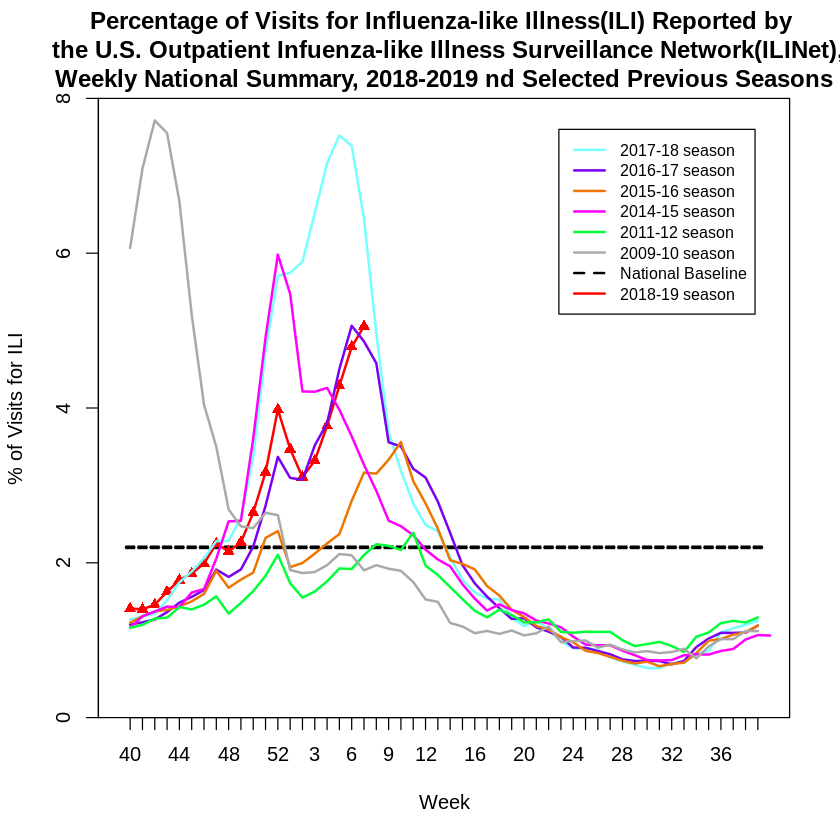

In [11]:
#Read all CSVs 
d1 <- read.csv("Year/2018-2019.csv",header=T, dec=".",sep=",")
d2 <- read.csv("Year/2017-2018.csv",header=T, dec=".",sep=",")
d3 <- read.csv("Year/2016-2017.csv",header=T, dec=".",sep=",")
d4 <- read.csv("Year/2015-2016.csv",header=T, dec=".",sep=",")
d5 <- read.csv("Year/2014-2015.csv",header=T, dec=".",sep=",")
d6 <- read.csv("Year/2011-2012.csv",header=T, dec=".",sep=",")
d7 <- read.csv("Year/2009-2010.csv",header=T, dec=".",sep=",")
nb <- read.csv("Year/NationalBaseline.csv",header=T, dec=".",sep=",")

#Convert all Weeks in factors(As we have to maintain the ordering of Week)
nb$WEEK <- as.character(nb$WEEK)
nb$WEEK <- factor(nb$WEEK, levels=unique(nb$WEEK))
d1$WEEK <- as.character(d1$WEEK)
d1$WEEK <- factor(d1$WEEK, levels=unique(d1$WEEK))
d2$WEEK <- as.character(d2$WEEK)
d2$WEEK <- factor(d2$WEEK, levels=unique(d2$WEEK))
d3$WEEK <- as.character(d3$WEEK)
d3$WEEK <- factor(d3$WEEK, levels=unique(d3$WEEK))
d4$WEEK <- as.character(d4$WEEK)
d4$WEEK <- factor(d4$WEEK, levels=unique(d4$WEEK))
d5$WEEK <- as.character(d5$WEEK)
d5$WEEK <- factor(d5$WEEK, levels=unique(d5$WEEK))
d6$WEEK <- as.character(d6$WEEK)
d6$WEEK <- factor(d6$WEEK, levels=unique(d6$WEEK))
d7$WEEK <- as.character(d7$WEEK)
d7$WEEK <- factor(d7$WEEK, levels=unique(d7$WEEK))

#Plot All the lines
plot(nb$WEEK,nb$X..OF.ILI.VISITS, xlab = "Week", ylab = "% of Visits for ILI", 
   main = "Percentage of Visits for Influenza-like Illness(ILI) Reported by \n the U.S. Outpatient Infuenza-like Illness Surveillance Network(ILINet),\n Weekly National Summary, 2018-2019 nd Selected Previous Seasons ",ylim=c(0.0,8.0),lwd=1, xaxs="i", yaxs="i")
lines(d1$WEEK,d1$X..WEIGHTED.ILI,type="o",col="red",lwd = 2,pch = 17)
lines(d2$WEEK,d2$X..WEIGHTED.ILI,col="#75FFFF",lwd = 2)
lines(d3$WEEK,d3$X..WEIGHTED.ILI,col="#7B00F2",lwd = 2)
lines(d4$WEEK,d4$X..WEIGHTED.ILI,col="#EE7600",lwd = 2)
lines(d5$WEEK,d5$X..WEIGHTED.ILI,col="#FF00FB",lwd = 2)
lines(d6$WEEK,d6$X..WEIGHTED.ILI,col="#00FF39",lwd = 2)
lines(d7$WEEK,d7$X..WEIGHTED.ILI,col="#A9A9A9",lwd = 2)

#Legend
legend("topright", legend=c("2017-18 season", "2016-17 season", "2015-16 season", "2014-15 season", "2011-12 season", "2009-10 season","National Baseline","2018-19 season"),
       col=c("#75FFFF", "#7B00F2","#EE7600","#FF00FB","#00FF39","#A9A9A9","black","red"), lty=c(1,1,1,1,1,1,2,1), cex=0.8, lwd=2, inset=0.05)

# Part 4) Pediatric deaths 

Read Data and Plot 2 bar graphs: Current Week and Previous Week

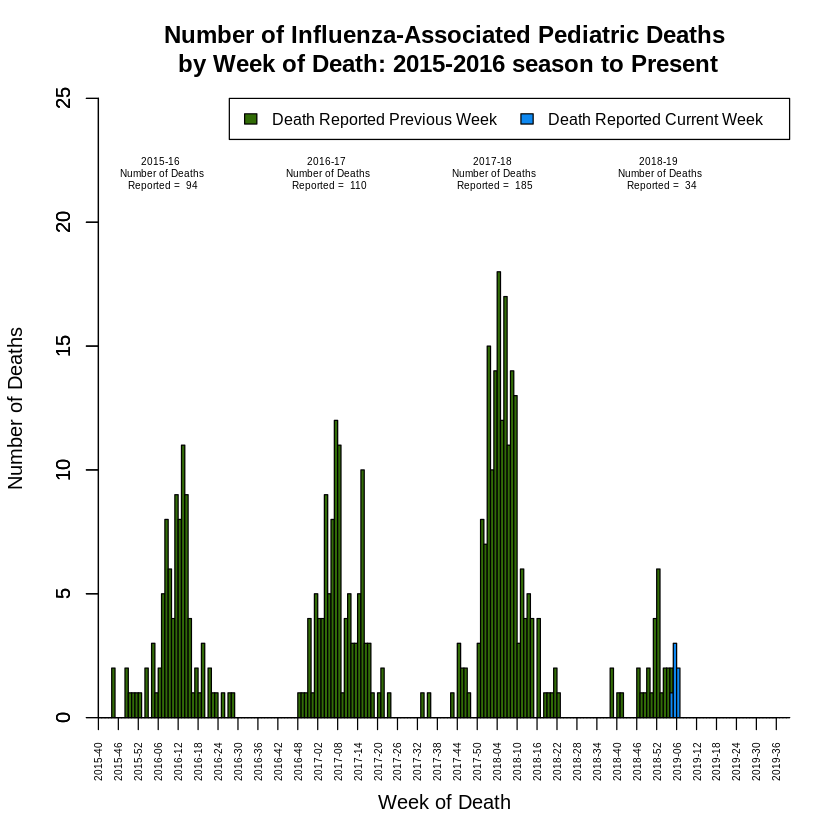

In [14]:
div <- read.csv("Weekly.csv",header=T, dec=".",sep=",")
#Create dataframe for Previous week deaths
D<-data.matrix(div$PREVIOUS.WEEK.DEATHS,div$WEEK.NUMBER)

#Create Data for Current Week Deaths
now <- data.matrix(div$CURRENT.WEEK.DEATHS,div$WEEK.NUMBER)

x <- data.matrix(div$SEASON,div$NO..OF.DEATHS)

#Creating the text displayed above years
#Calculating the sum of all the deaths in an year
sum<-cbind(aggregate(div$NO..OF.DEATHS, by=list(Category=div$SEASON), FUN=sum))
text <- paste(sum,"\n Number of Deaths \n Reported = ")
text=paste(text,sum)

#Text will contain 4 text that will be displayed later
for(i in 1:4)
    {
     text[i]<-paste(sum[i,1],"\n Number of Deaths \n Reported = ")
     text[i]<-paste(text[i],sum[i,2])
}

#Creating labels for x-axis
df<-data.frame(div$WEEK.NUMBER)
dfnew = df[seq(1, nrow(df), 6), ]

#Barpot Previous Year
barplot(D,main="Number of Influenza-Associated Pediatric Deaths\n by Week of Death: 2015-2016 season to Present",xlab = "Week of Death",col="#326c07",xaxs = "i",yaxs="i",beside = T, ylab = "Number of Deaths",ylim = range(0,25))
#Adding new plot 
par(new=T)
#Barplot for Current Year
barplot(now,beside = T,ylim = range(0,25),col="#0e88f0",xaxs = "i",yaxs="i")
#Create Respective Axis
axis(1,las=2,at=dfnew, labels=dfnew,cex.axis = 0.5)

#Add 4 texts
text(20,22,text[1],cex=0.5)
text(70,22,text[2],cex=0.5)
text(120,22,text[3],cex=0.5)
text(170,22,text[4],cex=0.5)

#Add Legend
legend("topright", legend=c("Death Reported Previous Week", "Death Reported Current Week"),
       fill=c("#326c07", "#0e88f0"), xpd = TRUE, horiz = TRUE, inset = c(0, 
    0),cex=0.8)

# Part 5) Flu heat map of USA

Read State Map data and get ili level from Activity Level and plot respective heat Map

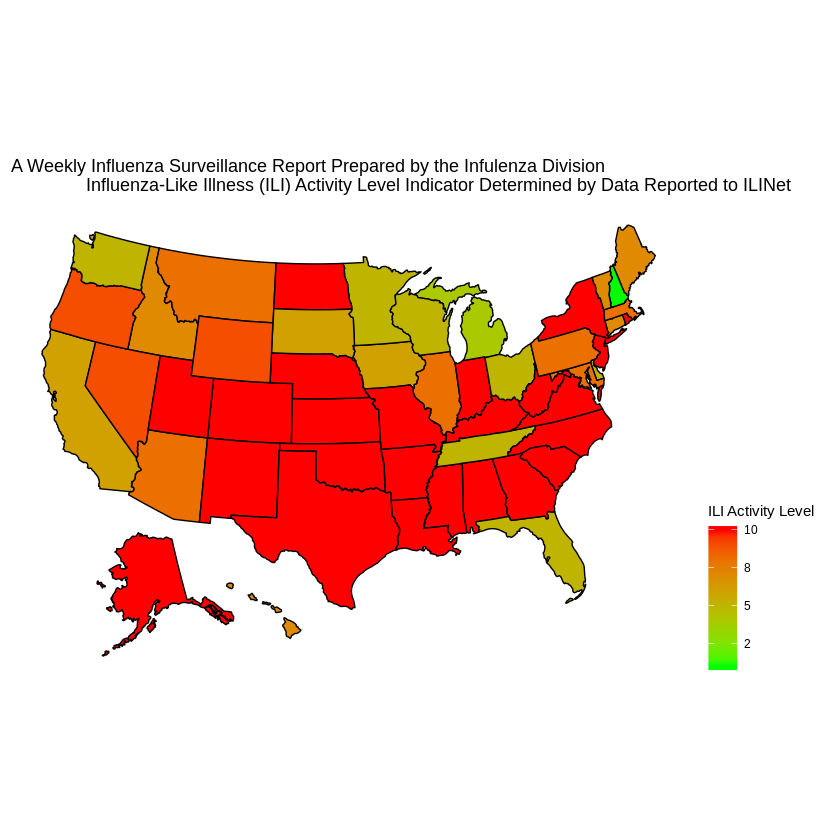

In [15]:
library(usmap)
div <- read.csv("StateDataforMap_2018-19week8.csv",header=T, dec=".",sep=",")
div$ili <- strtoi(gsub("Level ","",div$ACTIVITY.LEVEL))
plot_usmap(data = div, values = "ili", lines = "black") + 
  scale_fill_continuous(
    low = "green", high = "red", name = "ILI Activity Level", label = scales::comma
  ) + theme(legend.position = "right")+labs(title="A Weekly Influenza Surveillance Report Prepared by the Infulenza Division\n               Influenza-Like Illness (ILI) Activity Level Indicator Determined by Data Reported to ILINet")

# Part 6) Influenza national summary for 52 Weeks

Extracted data for year 2018(52 Weeks).
Tweeks made in csv file:
#1) The File first row had only one column name as Title for the csv. It was removed as csv read was failing
#2) Concatenation of Year and Week

In [25]:
div <- read.csv("WHO_NREVSS_Clinical_Labs_52Weeks.csv",header=T, dec=".",sep=",",stringsAsFactors = FALSE)
d<-data.frame(div$WEEK, div$TOTAL.A, div$TOTAL.B)
l<- data.frame(div$WEEK,div$PERCENT.POSITIVE,div$PERCENT.A,div$PERCENT.B)
names(d) <- c("Week","A","B")
l$div.PERCENT.POSITIVE<- l$div.PERCENT.POSITIVE*400 
l$div.PERCENT.A<- l$div.PERCENT.A*400 
l$div.PERCENT.B<- l$div.PERCENT.B*400 

Warning message:
“Removed 5 rows containing missing values (position_stack).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

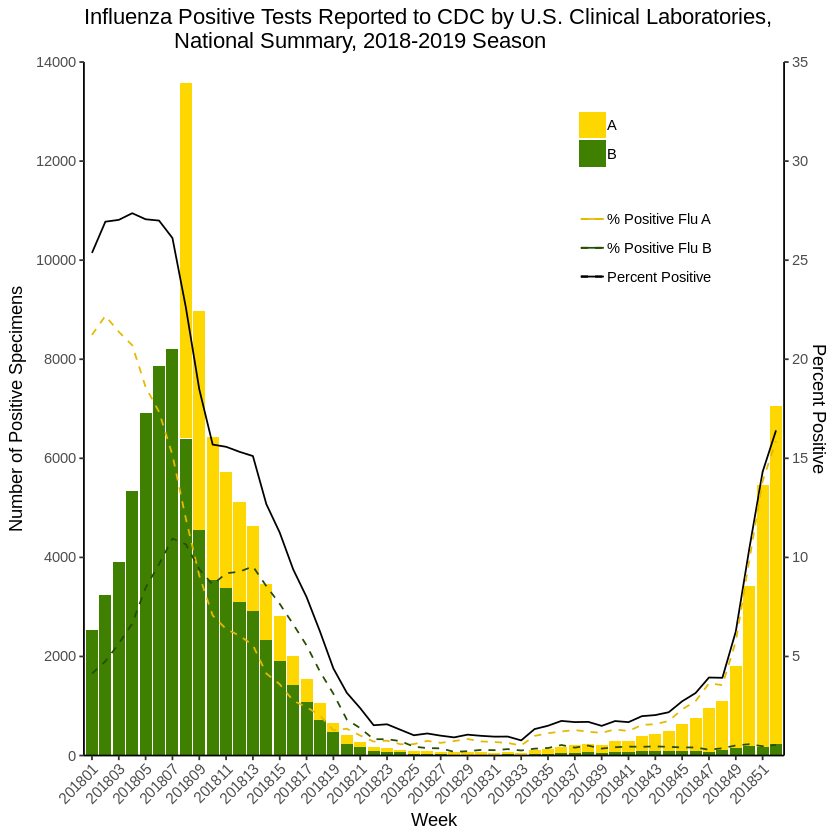

In [26]:
library(reshape2)
library(ggplot2)
df <- melt(d, id.var="Week")
g<-ggplot() + 
  geom_bar(data=df,aes(x = factor(Week), y = value, fill=variable),stat = "identity")+theme_classic()

g<-g+geom_line(data=l,aes(x=factor(div.WEEK), y=div.PERCENT.POSITIVE,color="Percent Positive"),stat="identity",group = 1)
g<-g+geom_line(data=l,aes(x=factor(div.WEEK), y=div.PERCENT.A,color="% Positive Flu A"),stat="identity",group = 1,linetype = "dashed")
g<-g+geom_line(data=l,aes(x=factor(div.WEEK), y=div.PERCENT.B,color="% Positive Flu B"),stat="identity",group = 1,linetype = "dashed")
g<-g+scale_y_continuous(expand = c(0, 0), limits = c(0, 14000),breaks = c(0,2000,4000,6000,8000,10000,12000,14000),name = expression("Number of Positive Specimens"),sec.axis = sec_axis(~./400, name="Percent Positive",breaks=c(5,10,15,20,25,30,35)))
g<- g+ scale_colour_manual(" ", values=c("Percent Positive"="Black","% Positive Flu A"="#e6b800","% Positive Flu B"="#264d00"))
g<-g+scale_x_discrete(breaks=seq("201801", "201852", 2))+theme(axis.text.x = element_text(angle = 45, hjust = 1))
g<-g+scale_fill_manual(" ", values=c("#ffd700","#408000"),labels=c("A", "B"))
g+theme(legend.key=element_blank(),
          legend.title=element_blank(),
          legend.box="vertical",legend.position = c(0.8, 0.8))+labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\n               National Summary, 2018-2019 Season",x="Week",y="Number of Positive Specimens")

# Part 7) Positive tested for 52 Weeks

Extracted data for year 2018(52 Weeks).
Tweeks made in csv file:
#1) The File first row had only one column name as Title for the csv. It was removed as csv read was failing
#2) Concatenation of Year and Week

Warning message:
“Removed 2 rows containing missing values (position_stack).”Warning message:
“Removed 14 rows containing missing values (geom_bar).”

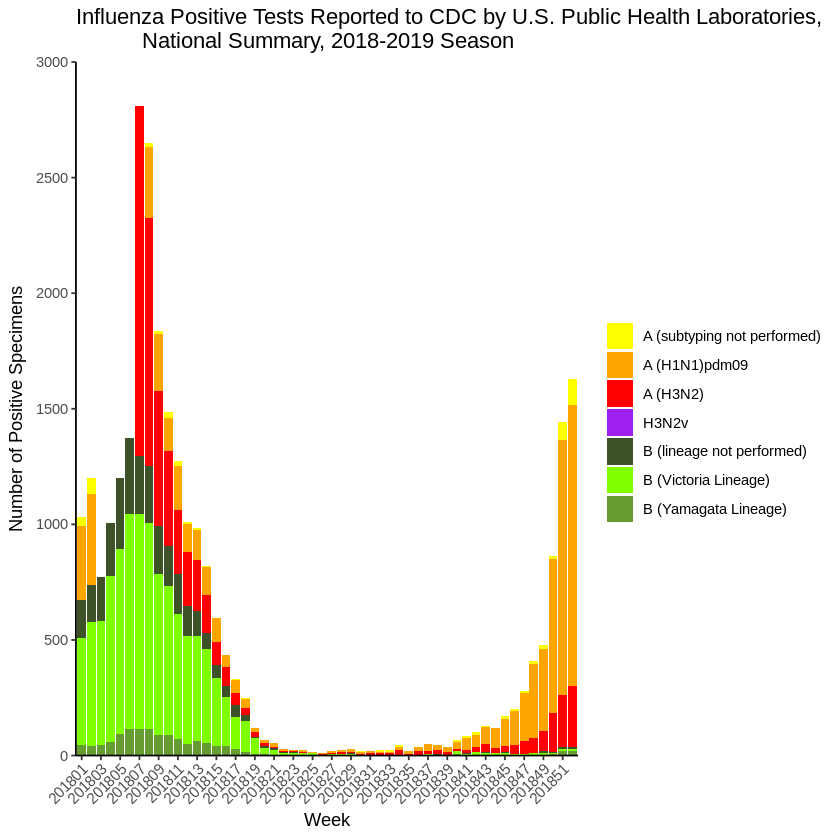

In [19]:
div <- read.csv("WHO_NREVSS_Public_Health_Labs_52Weeks.csv",header=T, dec=".",sep=",")
d<- data.frame(div$WEEK,div$A..Subtyping.not.Performed.,div$A..2009.H1N1.,div$A..H3.,div$H3N2v,div$B,div$BYam,div$BVic)
library(reshape2)
df<-melt(d, id.var="div.WEEK")
g<-ggplot() + 
  geom_bar(data=df,aes(x = factor(div.WEEK), y = value, fill=variable),stat = "identity")+theme_classic()
g+scale_y_continuous(expand = c(0, 0), limits = c(0, 3000),breaks = c(0,500,1000,1500,2000,2500,3000),name = expression("Number of Positive Specimens"))+
scale_x_discrete(breaks=seq("201801", "201952", 2))+theme(axis.text.x = element_text(angle = 45, hjust = 1))+
scale_fill_manual(" ",values=c("yellow", "orange","red","purple","#3D5229","#7FFF00","#659D32"),labels=c("A (subtyping not performed)", "A (H1N1)pdm09", "A (H3N2)", "H3N2v", "B (lineage not performed)", "B (Victoria Lineage)","B (Yamagata Lineage)"))+
labs(title="Influenza Positive Tests Reported to CDC by U.S. Public Health Laboratories,\n           National Summary, 2018-2019 Season",x="Week",y="Number of Positive Specimens")

## Part 8) Influenza national summary for 52 Weeks for New York State

Extracted data for year 52 weeks(2018-09 to 2019-08) for New York State and concatenated in one csv.
Tweeks made in csv file:
#1) The File first row had only one column name as Title for the csv. It was removed as csv read was failing
#2) Concatenation of Year and Week

In [21]:
div <- read.csv("WHO_NREVSS_Clinical_Labs_NewYork.csv",header=T, dec=".",sep=",",stringsAsFactors = FALSE)
d<-data.frame(div$WEEK, div$TOTAL.A, div$TOTAL.B)
l<- data.frame(div$WEEK,div$PERCENT.POSITIVE,div$PERCENT.A,div$PERCENT.B)
names(d) <- c("Week","A","B")
l$div.PERCENT.POSITIVE<- l$div.PERCENT.POSITIVE*40 
l$div.PERCENT.A<- l$div.PERCENT.A*40 
l$div.PERCENT.B<- l$div.PERCENT.B*40 

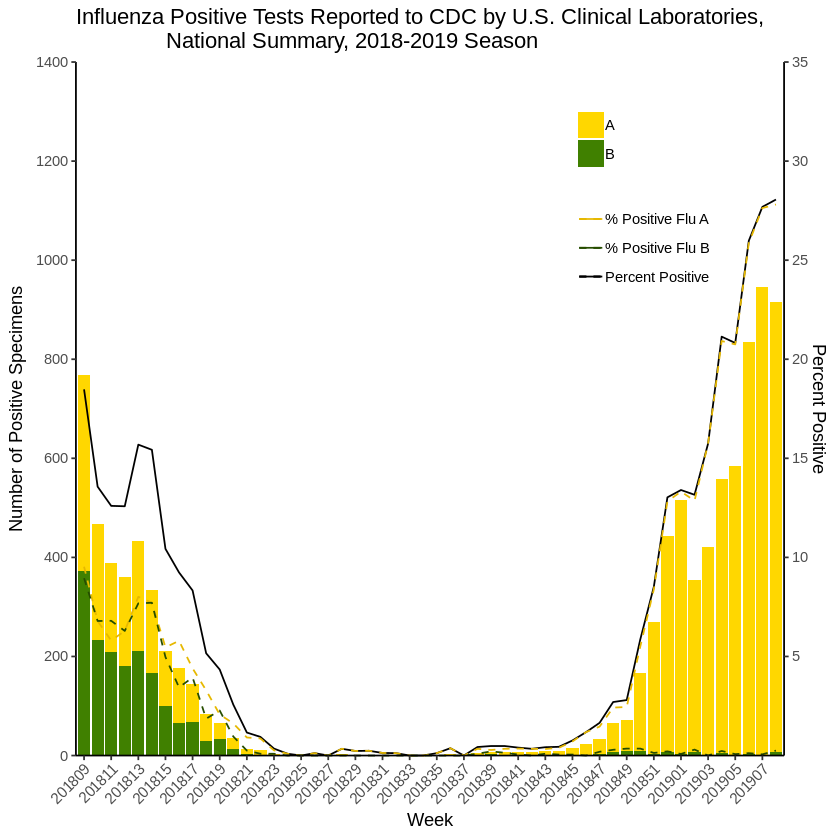

In [23]:
library(reshape2)
library(ggplot2)
df <- melt(d, id.var="Week")
g<-ggplot() + 
  geom_bar(data=df,aes(x = factor(Week), y = value, fill=variable),stat = "identity")+theme_classic()

g<-g+geom_line(data=l,aes(x=factor(div.WEEK), y=div.PERCENT.POSITIVE,color="Percent Positive"),stat="identity",group = 1)
g<-g+geom_line(data=l,aes(x=factor(div.WEEK), y=div.PERCENT.A,color="% Positive Flu A"),stat="identity",group = 1,linetype = "dashed")
g<-g+geom_line(data=l,aes(x=factor(div.WEEK), y=div.PERCENT.B,color="% Positive Flu B"),stat="identity",group = 1,linetype = "dashed")
g<-g+scale_y_continuous(expand = c(0, 0), limits = c(0, 1400),breaks = c(0,200,400,600,800,1000,1200,1400),name = expression("Number of Positive Specimens"),sec.axis = sec_axis(~./40, name="Percent Positive",breaks=c(5,10,15,20,25,30,35)))
g<- g+ scale_colour_manual(" ", values=c("Percent Positive"="Black","% Positive Flu A"="#e6b800","% Positive Flu B"="#264d00"))
g<-g+scale_x_discrete(breaks=seq("201809", "201908", 2))+theme(axis.text.x = element_text(angle = 45, hjust = 1))
g<-g+scale_fill_manual(" ", values=c("#ffd700","#408000"),labels=c("A", "B"))
g+theme(legend.key=element_blank(),
          legend.title=element_blank(),
          legend.box="vertical",legend.position = c(0.8, 0.8))+labs(title="Influenza Positive Tests Reported to CDC by U.S. Clinical Laboratories,\n               National Summary, 2018-2019 Season",x="Week",y="Number of Positive Specimens")